## Part c) Machine Learning Model for Capacity Prediction

Train a model to predict battery capacity using EIS data.

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: Use

   Example Index                                           Features  \
0              0  {'Cycle Count': 84.0, 'R(Z) (kΩ)': 105.2807224...   
1              1  {'Cycle Count': 54.0, 'R(Z) (kΩ)': 58.73433123...   
2              2  {'Cycle Count': 71.0, 'R(Z) (kΩ)': 81.30772342...   
3              3  {'Cycle Count': 46.0, 'R(Z) (kΩ)': 4.426433682...   
4              4  {'Cycle Count': 45.0, 'R(Z) (kΩ)': 34.18085932...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                 0.063558                    0.495463   -0.431904  
1                 0.894827                    0.649111    0.245716  
2                 0.772245                    0.366795    0.405450  
3                 0.662522                    0.409349    0.253174  
4                 0.258780                    0.402265   -0.143485  


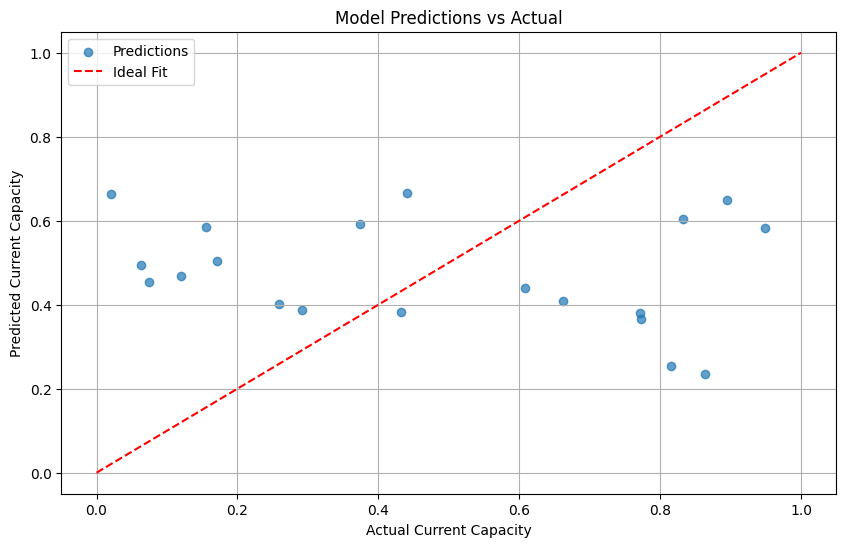

Model Evaluation (Full Test Set):
RMSE: 0.3647
MAE: 0.3275


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Task C: Predicting Current Capacity
np.random.seed(42)
current_capacity = np.random.uniform(0, 1, 100)
cycle_count = np.arange(1, 101)  # 100 cycles
real_impedance = np.random.uniform(0, 120, 100)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, 100)  # Simulated Im(Z) in kΩ

df_ml = pd.DataFrame({
    "Cycle Count": cycle_count,
    "R(Z) (kΩ)": real_impedance,
    "Im(Z) (kΩ)": imag_impedance,
    "Current Capacity": current_capacity
})

X = df_ml[["Cycle Count", "R(Z) (kΩ)", "Im(Z) (kΩ)"]]
y = df_ml["Current Capacity"]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Example predictions
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx].values.reshape(1, -1)
    actual = y_test.iloc[idx]
    prediction = model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": X_test.iloc[idx].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)

# Full evaluation on test set
predictions = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")